# MULTICLASS IMAGE CLASSIFICATION

## Import Data

In [1]:
# Import data from google drive
!gdown 1kHm179c6W3w6aanhgsrdnzraqCA_AecV

Downloading...
From (original): https://drive.google.com/uc?id=1kHm179c6W3w6aanhgsrdnzraqCA_AecV
From (redirected): https://drive.google.com/uc?id=1kHm179c6W3w6aanhgsrdnzraqCA_AecV&confirm=t&uuid=57a8cf8e-43e9-4b29-9357-f40f628e137c
To: /content/flowerssssss.zip
100% 210M/210M [00:03<00:00, 65.1MB/s]


In [2]:
# Unzip file
import zipfile

zip_ref = zipfile.ZipFile("flowerssssss.zip")
zip_ref.extractall()
zip_ref.close()

In [10]:
# Import helper functions
def split_dir_to_train_test_val(directory = "flowerdataset/test/",
                            train_size = 0.7,
                            test_size = 0.2,
                            val_size = 0.1):
  """
  Creates 3 folders for Train, Test and Validation data
  """
  import os
  import random
  import shutil

  # Set random seed
  rng = random.Random(42)

  for root, folders, files in os.walk(directory):
    for folder in folders:
      # Create list of the files
      list_of_files = []
      for file_name in os.listdir(root+folder+"/"):
        list_of_files.append(file_name)

      #  Shuffle the list
      rng.shuffle(list_of_files)

      # Create lists of files
      train_files = list_of_files[:int(len(list_of_files)*train_size)]
      test_files = list_of_files[int(len(list_of_files)*train_size) : int(len(list_of_files)*(train_size+test_size))]
      val_files = list_of_files[int(len(list_of_files)*(train_size+test_size)):]

      # Create folders and files for train data
      for one_file in train_files:

        # Copy  files
        dest_dir = "files/train/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # Create folders and files for test data
      for one_file in test_files:
        # Copy  files
        dest_dir = "files/test/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # Create folders and files for validation data
      for one_file in val_files:

        # Copy  files
        dest_dir = "files/validation/"+folder+"/"
        os.makedirs(dest_dir, exist_ok=True)

        shutil.copy2(src=(root+folder+"/"+one_file),
                    dst=(dest_dir+one_file))
      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")




def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)

In [11]:
# Split images dir to train, test and validation
split_dir_to_train_test_val(directory="flowerdataset/test/",
                            train_size=0.7,
                            test_size=0.2,
                            val_size=0.1)

Folder Lilly. Train data copied. 70 files
Folder Lilly. Test data copied. 19 files
Folder Lilly. Validation data copied. 11 files
Folder Orchid. Train data copied. 62 files
Folder Orchid. Test data copied. 18 files
Folder Orchid. Validation data copied. 9 files
Folder Lavender. Train data copied. 70 files
Folder Lavender. Test data copied. 19 files
Folder Lavender. Validation data copied. 11 files
Folder Sunflower. Train data copied. 70 files
Folder Sunflower. Test data copied. 19 files
Folder Sunflower. Validation data copied. 11 files
Folder Lotus. Train data copied. 70 files
Folder Lotus. Test data copied. 19 files
Folder Lotus. Validation data copied. 11 files
Folder Daisy. Train data copied. 64 files
Folder Daisy. Test data copied. 18 files
Folder Daisy. Validation data copied. 10 files
Folder Rose. Train data copied. 70 files
Folder Rose. Test data copied. 19 files
Folder Rose. Validation data copied. 11 files
Folder Tulip. Train data copied. 70 files
Folder Tulip. Test data copi

## Explore and Visualize The Data

In [12]:
# Using helper function get class names
class_names = get_class_names_from_folder(directory="files/train/")
class_names

array(['Daisy', 'Dandelion', 'Lavender', 'Lilly', 'Lotus', 'Orchid',
       'Rose', 'Sunflower', 'Tulip'], dtype='<U9')

In [25]:
len(class_names)

9

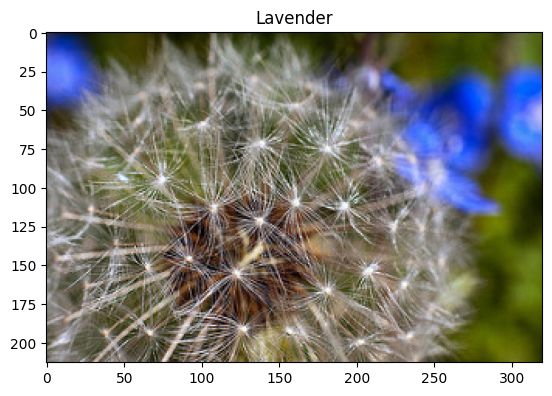

In [26]:
# Visualize some images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import random

def visualize_random_image(target_dir, target_class):
  """
  Visualises random image from exact directory
  """
  image_dir = target_dir + target_class
  random_image = random.sample(os.listdir(image_dir), 1)

  img = mpimg.imread(image_dir + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)

visualize_random_image("files/test/", "Lavender")

## Create Datasets From *Directories*

In [27]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="files/train",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(directory="files/test",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

validation_data = val_datagen.flow_from_directory(directory="files/validation",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 616 images belonging to 9 classes.
Found 169 images belonging to 9 classes.
Found 96 images belonging to 9 classes.


## Create and Fit The Model

In [28]:
# Set random seed
tf.random.set_seed(42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

# Create model
model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(9, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=Adam(),
              metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# Fit the model
history = model.fit(train_data,
                    batch_size=32,
                    epochs=20,
                    steps_per_epoch=len(train_data),
                    validation_data=validation_data,
                    validation_steps=len(validation_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.1688 - loss: 2.2636 - val_accuracy: 0.2604 - val_loss: 2.0467
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4474 - loss: 1.7809 - val_accuracy: 0.4167 - val_loss: 1.8331
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.5802 - loss: 1.4509 - val_accuracy: 0.3125 - val_loss: 1.8324
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6399 - loss: 1.1526 - val_accuracy: 0.3646 - val_loss: 1.7070
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.7611 - loss: 0.8678 - val_accuracy: 0.4167 - val_loss: 1.7602
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8409 - loss: 0.6324 - val_accuracy: 0.4375 - val_loss: 1.7044
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9109 - loss: 0.4321 - val_accuracy: 0.4375 - val_loss: 1.9880
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9332 - loss: 0.3123 - val_accuracy: 0.3646 - val_loss:

## Evaluate Model

In [30]:
model.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 799ms/step - accuracy: 0.3246 - loss: 2.7033


[2.5914573669433594, 0.36094674468040466]

<Axes: >

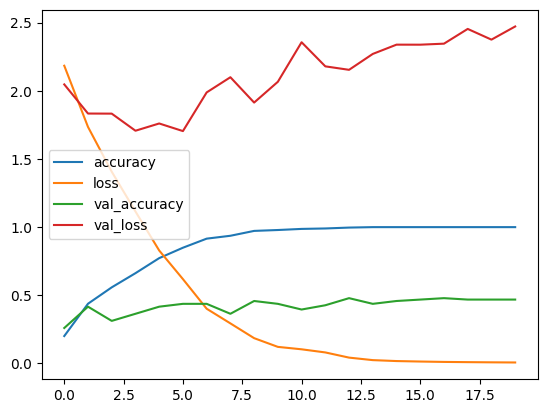

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot()

## Make Prediction

In [32]:
# Download image
!wget https://i.pinimg.com/474x/81/a7/0b/81a70b4157cfefd4621f59bb7a7be3a7.jpg

def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)

  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

--2025-06-02 05:04:57--  https://i.pinimg.com/474x/81/a7/0b/81a70b4157cfefd4621f59bb7a7be3a7.jpg
Resolving i.pinimg.com (i.pinimg.com)... 184.27.177.8, 184.27.177.5, 2a04:4e42::84, ...
Connecting to i.pinimg.com (i.pinimg.com)|184.27.177.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41012 (40K) [image/jpeg]
Saving to: ‘81a70b4157cfefd4621f59bb7a7be3a7.jpg.1’

81a70b4157cfefd4621 100%[===================>]  40.05K  --.-KB/s    in 0.01s   

2025-06-02 05:04:57 (3.75 MB/s) - ‘81a70b4157cfefd4621f59bb7a7be3a7.jpg.1’ saved [41012/41012]



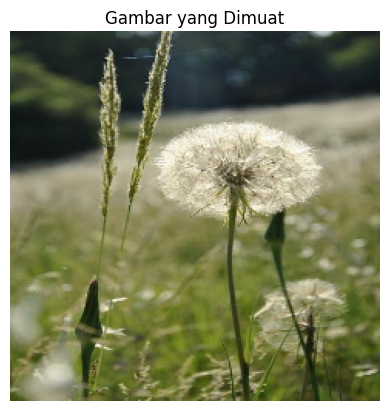

In [33]:
image = load_and_resize_image("81a70b4157cfefd4621f59bb7a7be3a7.jpg", 240)

# Show Image
plt.imshow(image)
plt.axis("off")
plt.title("Gambar yang Dimuat")
plt.show()

In [34]:
pred = model.predict(tf.expand_dims(image, axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


array([[1.9361009e-03, 7.0017123e-01, 8.6068854e-02, 1.9714023e-01,
        1.1079084e-02, 3.0011606e-05, 3.6829915e-05, 1.6868124e-03,
        1.8508068e-03]], dtype=float32)

In [35]:
class_names[pred[0].argmax()]

np.str_('Dandelion')